After generating all columns take the final data saved


In [ ]:
import geopandas as gpd
df_combined=gpd.read_parquet("../midsave/consolidated_reforestation_projects.parquet")
df_combined.info()

<ipython-input-1-4624b957dd01>:2: DtypeWarning: Columns (23,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  db1 = pd.read_csv('/content/drive/My Drive/Indices_MultiYear_Chunk_0.csv')
<ipython-input-1-4624b957dd01>:3: DtypeWarning: Columns (23,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  db2 = pd.read_csv('/content/drive/My Drive/Indices_MultiYear_Chunk_1.csv')
<ipython-input-1-4624b957dd01>:4: DtypeWarning: Columns (23,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  db3 = pd.read_csv('/content/drive/My Drive/Indices_MultiYear_Chunk_2.csv')
<ipython-input-1-4624b957dd01>:5: DtypeWarning: Columns (23,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  db4 = pd.read_csv('/content/drive/My Drive/Indices_MultiYear_Chunk_3.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772494 entries, 0 to 772493
Data columns (total 40 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   system:index  772494 non-null  object 
 1   1Year_After   646685 non-null  object 
 2   2Years_After  658883 non-null  object 
 3   5Years_After  518301 non-null  object 
 4   At_Planting   466667 non-null  object 
 5   Intersec_1    253603 non-null  object 
 6   Nested_in     26901 non-null   object 
 7   Top_Three_    772494 non-null  object 
 8   built_area    772494 non-null  float64
 9   country       767262 non-null  object 
 10  created_pr    772494 non-null  object 
 11  created_si    772494 non-null  object 
 12  cropland g    772494 non-null  float64
 13  cropland l    772494 non-null  float64
 14  descriptio    735699 non-null  object 
 15  geometry_r    772494 non-null  object 
 16  host_name     772494 non-null  object 
 17  intersecti    772494 non-null  int64  
 18  loss

In [ ]:
# Dropping rows with null values in the columns
columns_to_check = [
    "NDVI_At_Planting",
    "NDVI_1Year_After",
    "NDVI_2Years_After",
    "NDVI_5Years_After"
]

filtered_data =df_combined.dropna(subset=columns_to_check)
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253437 entries, 0 to 772481
Data columns (total 60 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   system:index               253437 non-null  object 
 1   1Year_After                253437 non-null  object 
 2   2Years_After               253437 non-null  object 
 3   5Years_After               253437 non-null  object 
 4   At_Planting                253437 non-null  object 
 5   Intersec_1                 88470 non-null   object 
 6   Nested_in                  10039 non-null   object 
 7   Top_Three_                 253437 non-null  object 
 8   built_area                 253437 non-null  float64
 9   country                    253429 non-null  object 
 10  created_pr                 253437 non-null  object 
 11  created_si                 253437 non-null  object 
 12  cropland g                 253437 non-null  float64
 13  cropland l                 253437 

<ipython-input-13-22d6bef340da>:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


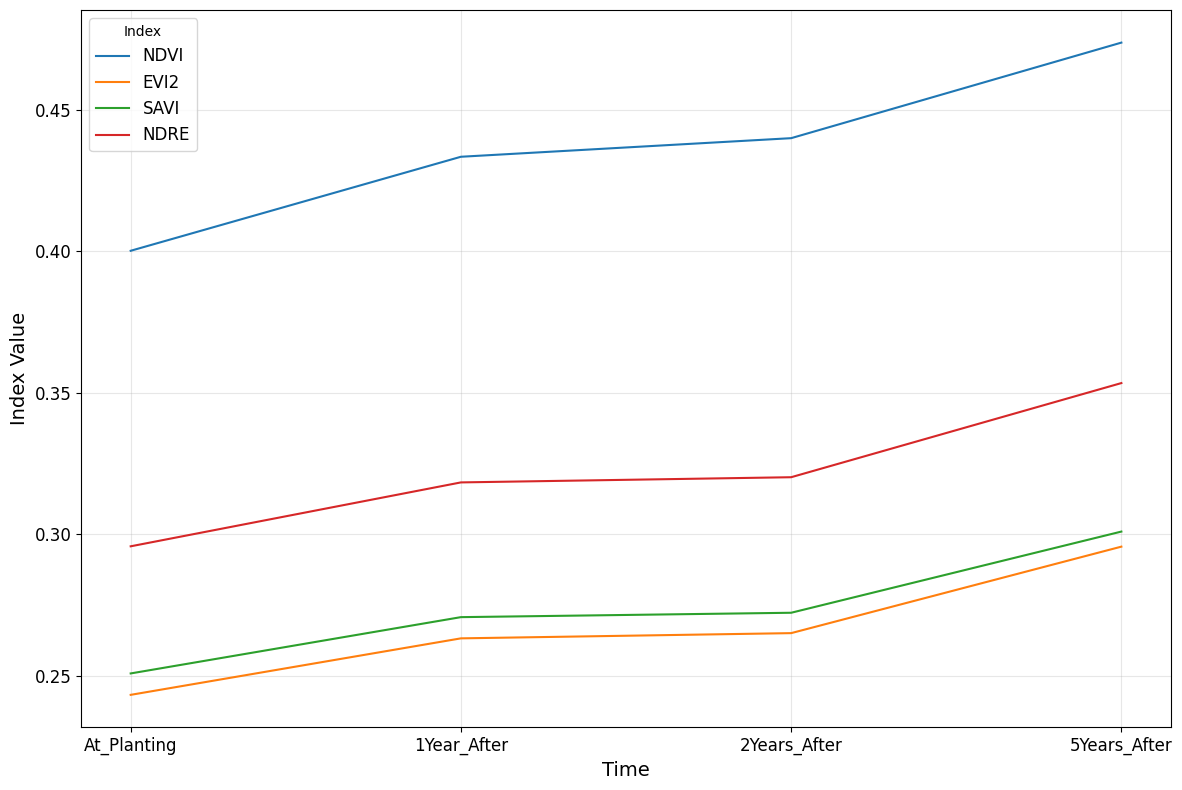

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Selecting indices columns to use for visualization
columns = [
    'NDVI_At_Planting', 'EVI2_At_Planting', 'SAVI_At_Planting', 'NDRE_At_Planting',
    'NDVI_1Year_After', 'EVI2_1Year_After', 'SAVI_1Year_After', 'NDRE_1Year_After',
    'NDVI_2Years_After', 'EVI2_2Years_After', 'SAVI_2Years_After', 'NDRE_2Years_After',
    'NDVI_5Years_After', 'EVI2_5Years_After', 'SAVI_5Years_After', 'NDRE_5Years_After'
]


indices_df = filtered_data[columns]


long_df = pd.melt(
    indices_df,
    var_name='Index_Time',
    value_name='Value'
)


long_df['Index'] = long_df['Index_Time'].str.split('_', n=1).str[0]
long_df['Time'] = long_df['Index_Time'].str.split('_', n=1).str[1]

time_order = ['At_Planting', '1Year_After', '2Years_After', '5Years_After']
long_df['Time'] = pd.Categorical(long_df['Time'], categories=time_order, ordered=True)


plt.figure(figsize=(12, 8))
sns.lineplot(
    data=long_df,
    x='Time',
    y='Value',
    hue='Index',
    estimator='mean',
    ci=None
)


#plt.title('Time Series Trends of Vegetation Indices', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Index Value', fontsize=14)
plt.legend(title='Index', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


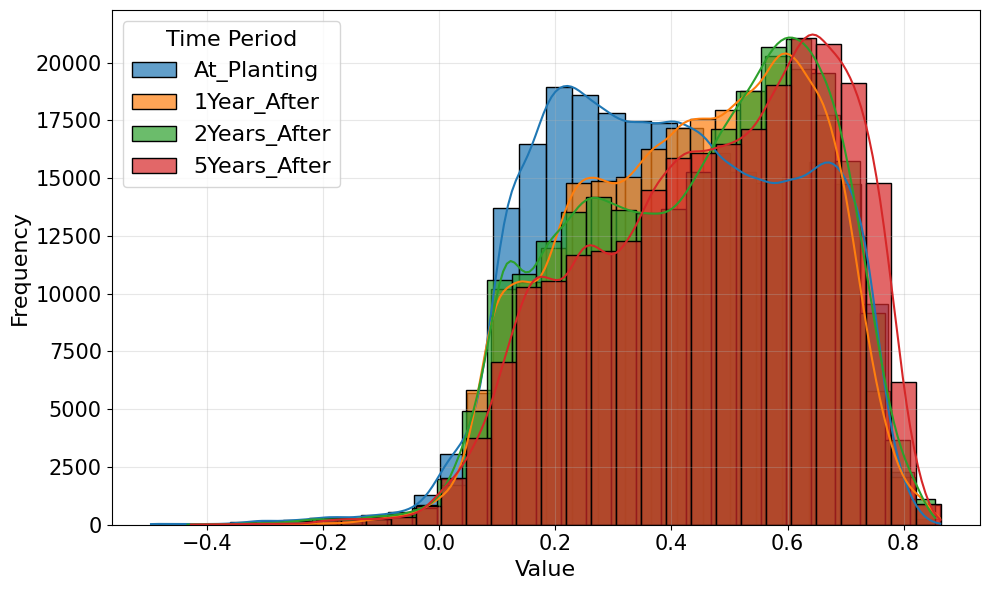

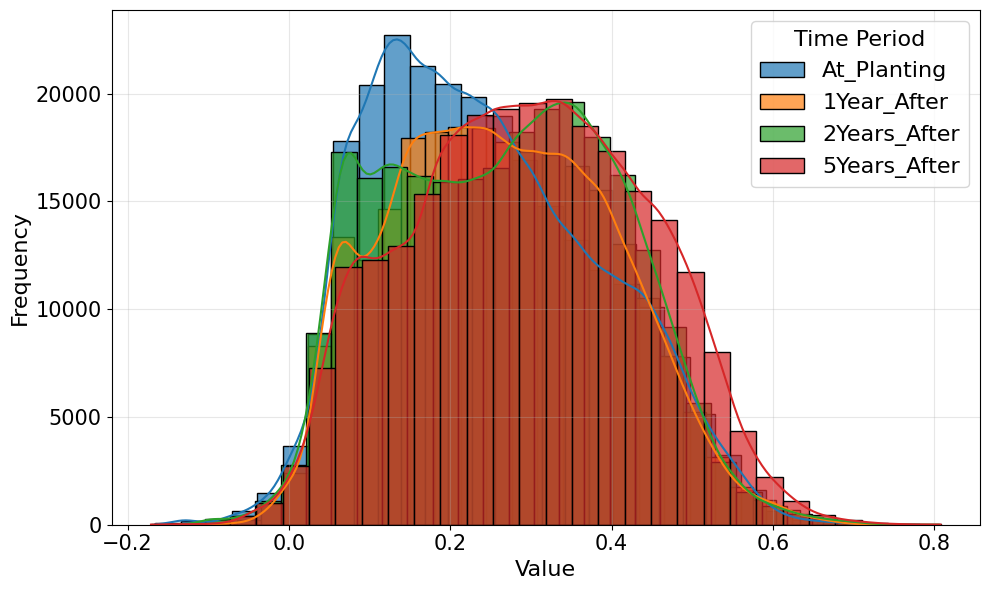

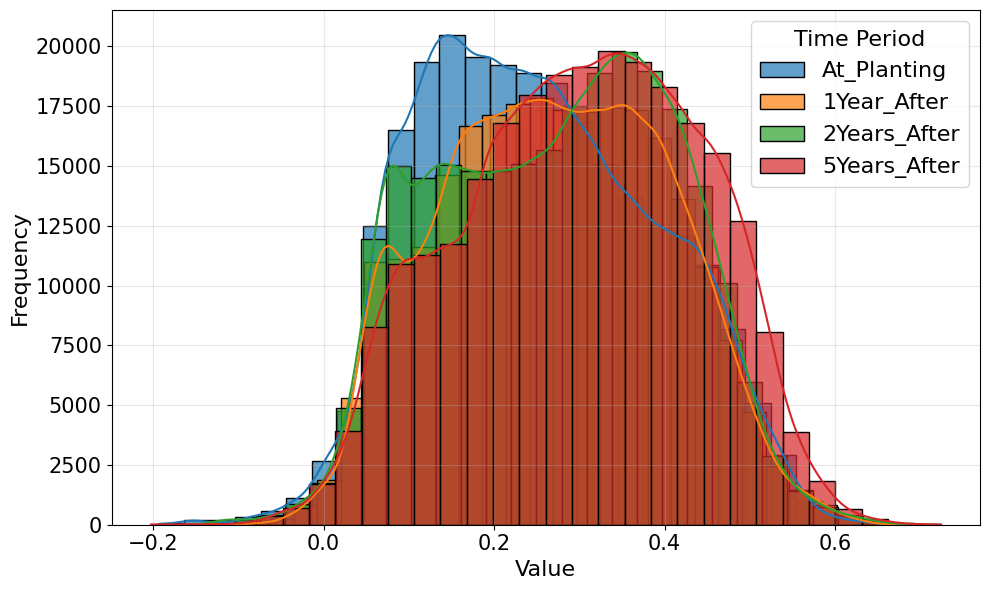

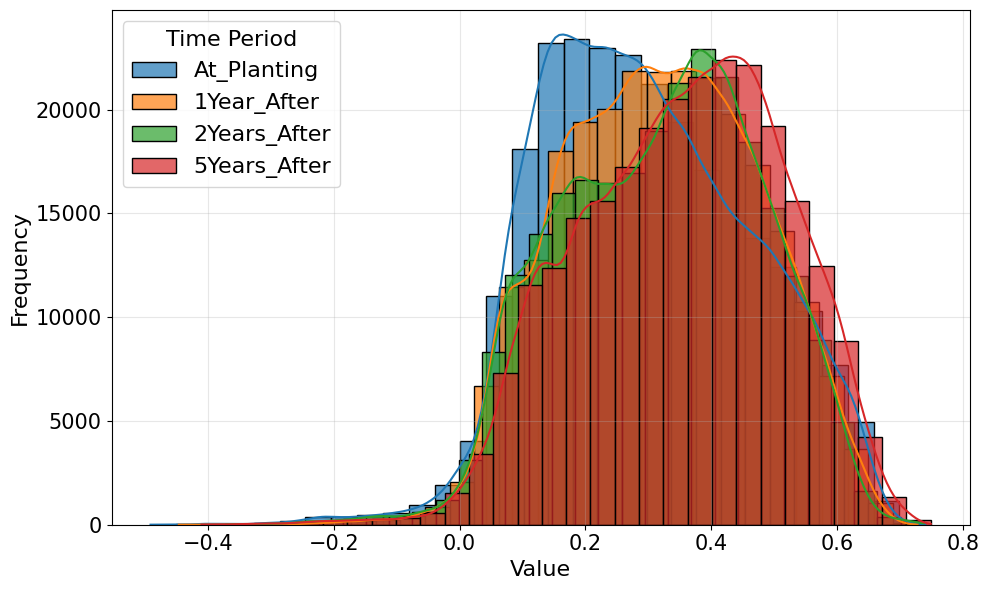

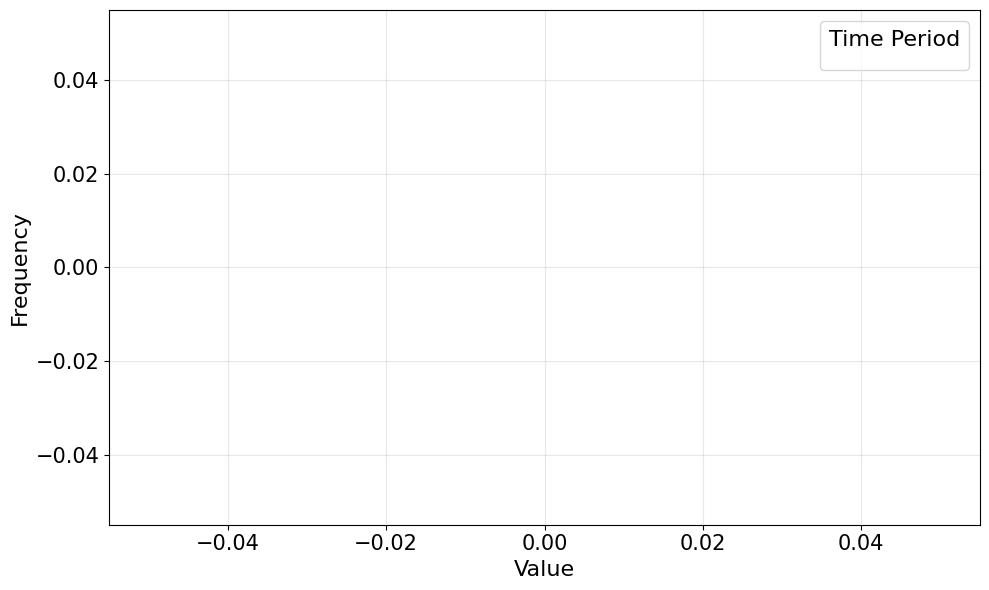

In [ ]:




indices = long_df['Index'].unique()
time_periods = long_df['Time'].cat.categories

for index in indices:
    plt.figure(figsize=(10, 6))
    for time in time_periods:
        subset = long_df[(long_df['Index'] == index) & (long_df['Time'] == time)]
        sns.histplot(subset['Value'], kde=True, label=time, bins=30, alpha=0.7)

    #plt.title(f'Histogram of {index} Across Time Periods', fontsize=16)
    plt.xlabel('Value', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)


    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)


    plt.legend(title='Time Period', fontsize=16, title_fontsize=16)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


## DID Analysis

Checking on buffer and polygon NDVI olumns names to ensure they are named accordingly else rename

In [ ]:
merged_data = df_combined.rename(columns={
    "NDVI_Polygon_At_Planting": "NDVI_Polygon_At_Planting",
    "NDVI_Polygon_1YearAfter": "NDVI_Polygon_1YearAfter",
    "NDVI_Polygon_2YearsAfter": "NDVI_Polygon_2YearsAfter",
    "NDVI_Polygon_5YearsAfter": "NDVI_Polygon_5YearsAfter",
    "NDVI_At_Planting_Buffer": "NDVI_Buffer_At_Planting",
    "NDVI_1Year_After_Buffer": "NDVI_Buffer_1YearAfter",
    "NDVI_2Years_After_Buffer": "NDVI_Buffer_2YearsAfter",
    "NDVI_5Years_After_Buffer": "NDVI_Buffer_5YearsAfter"
})

In [ ]:
# Filtering a representative sample based on some quality indicators
filtered_data = merged_data[
    (merged_data['NDVI_Polygon_At_Planting'] < 0.3)
]
# filtered_data = filtered_data[(filtered_data['tree_cover_atplanting'] == 0.0)]
filtered_data = filtered_data[(filtered_data['built_area']== 0.0)]
filtered_data = filtered_data[(filtered_data['total_road']== 0.0)]


In [ ]:
columns_to_check = [
    "NDVI_Polygon_At_Planting",
    "NDVI_Polygon_1YearAfter",
    "NDVI_Polygon_2YearsAfter",
    "NDVI_Polygon_5YearsAfter",
    "NDVI_Buffer_At_Planting",
    "NDVI_Buffer_1YearAfter",
    "NDVI_Buffer_2YearsAfter",
    "NDVI_Buffer_5YearsAfter"
]

filtered_data = filtered_data.dropna(subset=columns_to_check)
filtered_data.info()

In [ ]:
# Selecting specific columns to filter for polygon area or treatment experiment
treat_df = filtered_data[['NDVI_Polygon_At_Planting', 'NDVI_Polygon_1YearAfter', 'NDVI_Polygon_2YearsAfter','NDVI_Polygon_5YearsAfter']]
treat_df['state'] = 1
treat_df=treat_df.rename(columns={

    "NDVI_Polygon_At_Planting": "NDVI_At_Planting",
    "NDVI_Polygon_1YearAfter": "NDVI_1YearAfter",
    "NDVI_Polygon_2YearsAfter": "NDVI_2YearsAfter",
    "NDVI_Polygon_5YearsAfter": "NDVI_5YearsAfter"
})
treat_df.info()

In [ ]:
# Selecting specific columns to filter for the buffer region/control experiment
cont_df = filtered_data[['NDVI_Buffer_At_Planting', 'NDVI_Buffer_1YearAfter', 'NDVI_Buffer_2YearsAfter','NDVI_Buffer_5YearsAfter']]
cont_df['state'] = 0
cont_df=cont_df.rename(columns={

    "NDVI_Buffer_At_Planting": "NDVI_At_Planting",
    "NDVI_Buffer_1YearAfter": "NDVI_1YearAfter",
    "NDVI_Buffer_2YearsAfter": "NDVI_2YearsAfter",
    "NDVI_Buffer_5YearsAfter": "NDVI_5YearsAfter"
})
cont_df.info()

In [ ]:
did_data = pd.concat([treat_df, cont_df])

did_data.info()

## DID ANALYSIS

In [ ]:

filtered_df = did_data[['state', 'NDVI_At_Planting', 'NDVI_1YearAfter']]

In [ ]:
filtered_df.groupby('state').mean()

,NDVI_At_Planting,NDVI_1YearAfter
state,,
0,0.484081,0.494792
1,0.520647,0.545444


In [ ]:


mean_NDVI_cont_before = filtered_df.groupby('state').mean().iloc[0, 0]
mean_NDVI_cont_after = filtered_df.groupby('state').mean().iloc[0, 1]
mean_NDVI_treat_before = filtered_df.groupby('state').mean().iloc[1, 0]
mean_NDVI_treat_after = filtered_df.groupby('state').mean().iloc[1, 1]

print(f'mean control NDVI before: {mean_NDVI_cont_before:.2f}')
print(f'mean control NDVI after: {mean_NDVI_cont_after:.2f}')
print(f'mean treatment NDVI before: {mean_NDVI_treat_before:.2f}')
print(f'mean treatment NDVI after: {mean_NDVI_treat_after:.2f}')

pa_diff = mean_NDVI_cont_after - mean_NDVI_cont_before
nj_diff = mean_NDVI_treat_after - mean_NDVI_treat_before
did = nj_diff - pa_diff

print(f'DID in mean employment is {did:.2f}')

mean control NDVI before: 0.48
mean control NDVI after: 0.49
mean treatment NDVI before: 0.52
mean treatment NDVI after: 0.55
DID in mean employment is 0.01


In [ ]:

df_before = filtered_df[['NDVI_At_Planting', 'state']]
df_before['t'] = 0
df_before.columns = ['NDVI', 'g', 't']


df_after = filtered_df[['NDVI_1YearAfter', 'state']]
df_after['t'] = 1
df_after.columns = ['NDVI', 'g', 't']

In [ ]:
#  regression data creation
df_reg = pd.concat([df_before, df_after])

#  interaction  data
df_reg['gt'] = df_reg.g * df_reg.t

df_reg

,NDVI,g,t,gt
3,0.486133,1,0,0
114,0.541068,1,0,0
225,0.497971,1,0,0
336,0.451149,1,0,0
447,0.486220,1,0,0
...,...,...,...,...
772040,0.365274,0,1,0
772151,0.584012,0,1,0
772262,0.513690,0,1,0
772373,0.400379,0,1,0


## OLS regression in DID

In [ ]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = df_reg[['g', 't', 'gt']]
y = df_reg.NDVI

lr.fit(X, y)
lr.coef_

array([0.03656607, 0.01071086, 0.01408549])

In [ ]:
 #pip install statsmodels

In [ ]:

from statsmodels.formula.api import ols
ols = ols('NDVI ~ g + t + gt', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     4.807
Date:                Wed, 20 Nov 2024   Prob (F-statistic):            0.00257
Time:                        20:50:09   Log-Likelihood:                 275.22
No. Observations:                 592   AIC:                            -542.4
Df Residuals:                     588   BIC:                            -524.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4841      0.013     38.612      0.0

# Year 2 DID

In [ ]:

filtered_df = did_data[['state', 'NDVI_At_Planting', 'NDVI_2YearsAfter']]

In [ ]:
filtered_df.groupby('state').mean()

,NDVI_At_Planting,NDVI_2YearsAfter
state,,
0,0.484081,0.504448
1,0.520647,0.549850


In [ ]:


mean_NDVI_cont_before = filtered_df.groupby('state').mean().iloc[0, 0]
mean_NDVI_cont_after = filtered_df.groupby('state').mean().iloc[0, 1]
mean_NDVI_treat_before = filtered_df.groupby('state').mean().iloc[1, 0]
mean_NDVI_treat_after = filtered_df.groupby('state').mean().iloc[1, 1]

print(f'mean control NDVI before: {mean_NDVI_cont_before:.2f}')
print(f'mean control NDVI after: {mean_NDVI_cont_after:.2f}')
print(f'mean treatment NDVI before: {mean_NDVI_treat_before:.2f}')
print(f'mean treatment NDVI after: {mean_NDVI_treat_after:.2f}')

pa_diff = mean_NDVI_cont_after - mean_NDVI_cont_before
nj_diff = mean_NDVI_treat_after - mean_NDVI_treat_before
did = nj_diff - pa_diff

print(f'DID in mean employment is {did:.2f}')

mean control NDVI before: 0.48
mean control NDVI after: 0.50
mean treatment NDVI before: 0.52
mean treatment NDVI after: 0.55
DID in mean employment is 0.01


In [ ]:

df_before = filtered_df[['NDVI_At_Planting', 'state']]
df_before['t'] = 0
df_before.columns = ['NDVI', 'g', 't']


df_after = filtered_df[['NDVI_2YearsAfter', 'state']]
df_after['t'] = 1
df_after.columns = ['NDVI', 'g', 't']

In [ ]:

df_reg = pd.concat([df_before, df_after])


df_reg['gt'] = df_reg.g * df_reg.t

df_reg

,NDVI,g,t,gt
3,0.486133,1,0,0
114,0.541068,1,0,0
225,0.497971,1,0,0
336,0.451149,1,0,0
447,0.486220,1,0,0
...,...,...,...,...
772040,0.357472,0,1,0
772151,0.533199,0,1,0
772262,0.525423,0,1,0
772373,0.408212,0,1,0


In [ ]:

lr = LinearRegression()

X = df_reg[['g', 't', 'gt']]
y = df_reg.NDVI

lr.fit(X, y)
lr.coef_

array([0.03656607, 0.02036646, 0.00883643])

In [ ]:
from statsmodels.formula.api import ols
ols = ols('NDVI ~ g + t + gt', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     4.999
Date:                Wed, 20 Nov 2024   Prob (F-statistic):            0.00197
Time:                        20:50:31   Log-Likelihood:                 280.78
No. Observations:                 592   AIC:                            -553.6
Df Residuals:                     588   BIC:                            -536.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4841      0.012     38.976      0.0

# Year 5 DID

In [ ]:

filtered_df = did_data[['state', 'NDVI_At_Planting', 'NDVI_5YearsAfter']]

In [ ]:
filtered_df.groupby('state').mean()

,NDVI_At_Planting,NDVI_5YearsAfter
state,,
0,0.484081,0.499147
1,0.520647,0.554422


In [ ]:

mean_NDVI_cont_before = filtered_df.groupby('state').mean().iloc[0, 0]
mean_NDVI_cont_after = filtered_df.groupby('state').mean().iloc[0, 1]
mean_NDVI_treat_before = filtered_df.groupby('state').mean().iloc[1, 0]
mean_NDVI_treat_after = filtered_df.groupby('state').mean().iloc[1, 1]

print(f'mean control NDVI before: {mean_NDVI_cont_before:.2f}')
print(f'mean control NDVI after: {mean_NDVI_cont_after:.2f}')
print(f'mean treatment NDVI before: {mean_NDVI_treat_before:.2f}')
print(f'mean treatment NDVI after: {mean_NDVI_treat_after:.2f}')

pa_diff = mean_NDVI_cont_after - mean_NDVI_cont_before
nj_diff = mean_NDVI_treat_after - mean_NDVI_treat_before
did = nj_diff - pa_diff

print(f'DID in mean employment is {did:.2f}')

mean control NDVI before: 0.48
mean control NDVI after: 0.50
mean treatment NDVI before: 0.52
mean treatment NDVI after: 0.55
DID in mean employment is 0.02


In [ ]:

df_before = filtered_df[['NDVI_At_Planting', 'state']]
df_before['t'] = 0
df_before.columns = ['NDVI', 'g', 't']


df_after = filtered_df[['NDVI_5YearsAfter', 'state']]
df_after['t'] = 1
df_after.columns = ['NDVI', 'g', 't']

In [ ]:

df_reg = pd.concat([df_before, df_after])


df_reg['gt'] = df_reg.g * df_reg.t

df_reg

,NDVI,g,t,gt
3,0.486133,1,0,0
114,0.541068,1,0,0
225,0.497971,1,0,0
336,0.451149,1,0,0
447,0.486220,1,0,0
...,...,...,...,...
772040,0.224606,0,1,0
772151,0.494216,0,1,0
772262,0.474563,0,1,0
772373,0.369191,0,1,0


In [ ]:

lr = LinearRegression()

X = df_reg[['g', 't', 'gt']]
y = df_reg.NDVI

lr.fit(X, y)
lr.coef_

array([0.03656607, 0.01506535, 0.01870918])

In [ ]:
from statsmodels.formula.api import ols
ols = ols('NDVI ~ g + t + gt', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     5.338
Date:                Wed, 20 Nov 2024   Prob (F-statistic):            0.00124
Time:                        20:50:50   Log-Likelihood:                 244.46
No. Observations:                 592   AIC:                            -480.9
Df Residuals:                     588   BIC:                            -463.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4841      0.013     36.656      0.0